인구 공공데이터는 http://27.101.213.4/index.jsp 에서 받으시면 됩니다. 과제에 필요한 데이터를 csv파일로 저장한 후 불필요한 부분에 대해 꼭 정제를 한후 데이터를 사용합니다.

 

수강생이 태어난 지역의 2009년과 2020년의 데이터를 각각 다운로드 합니다. 


출생지역의 남여구분하여(남여구분선택) 다운로드한 데이터를 사용하여, 출생지(동 단위)를 입력받아 2009년과 2020년에 각각 해당하는 연령대별 성별 비율 산점도를 각각 시각화합니다.

산점도 표현시 추세선 그래표는 녹색으로 표현하고, 버블원의 크기는 인구수의 제곱근으로 표현하며, 컬러바(cmap)는 jet로 표현합니다. 

산점도로 표현된 파일은 프로그램상에서 저장합니다

(강의자료:우리 동네 인구 구조 다양하게 시각화 하기, 81페이지 참고).

찾고 싶은 지역의 이름을 알려주세요: 철산3동


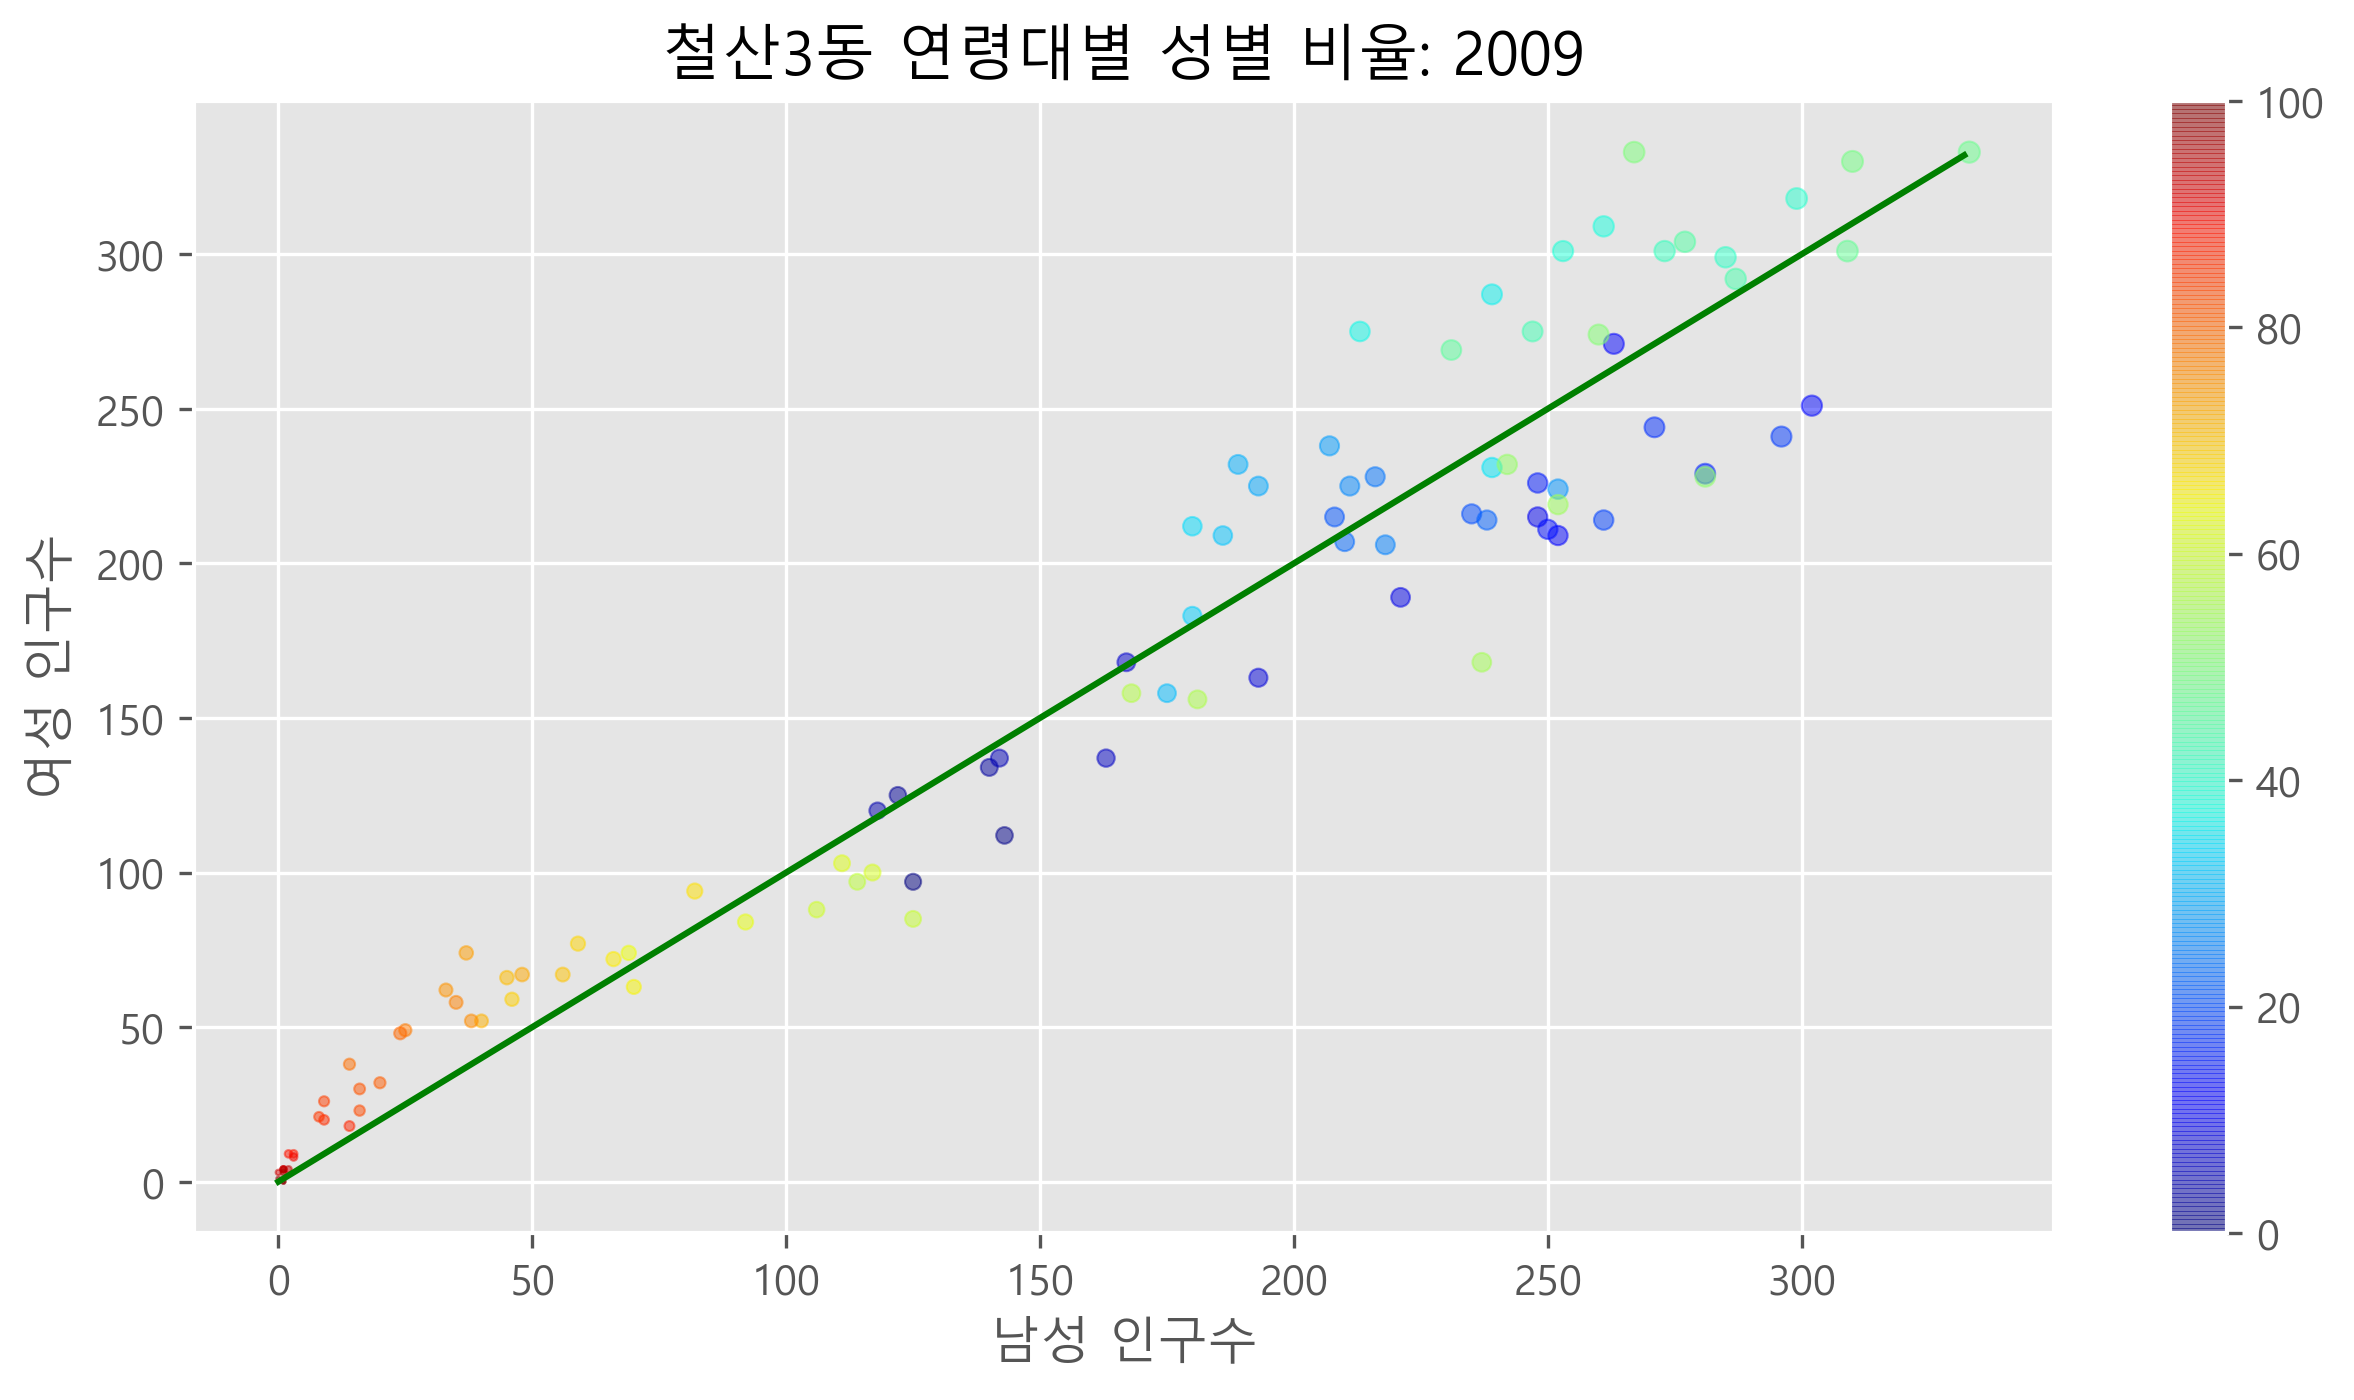

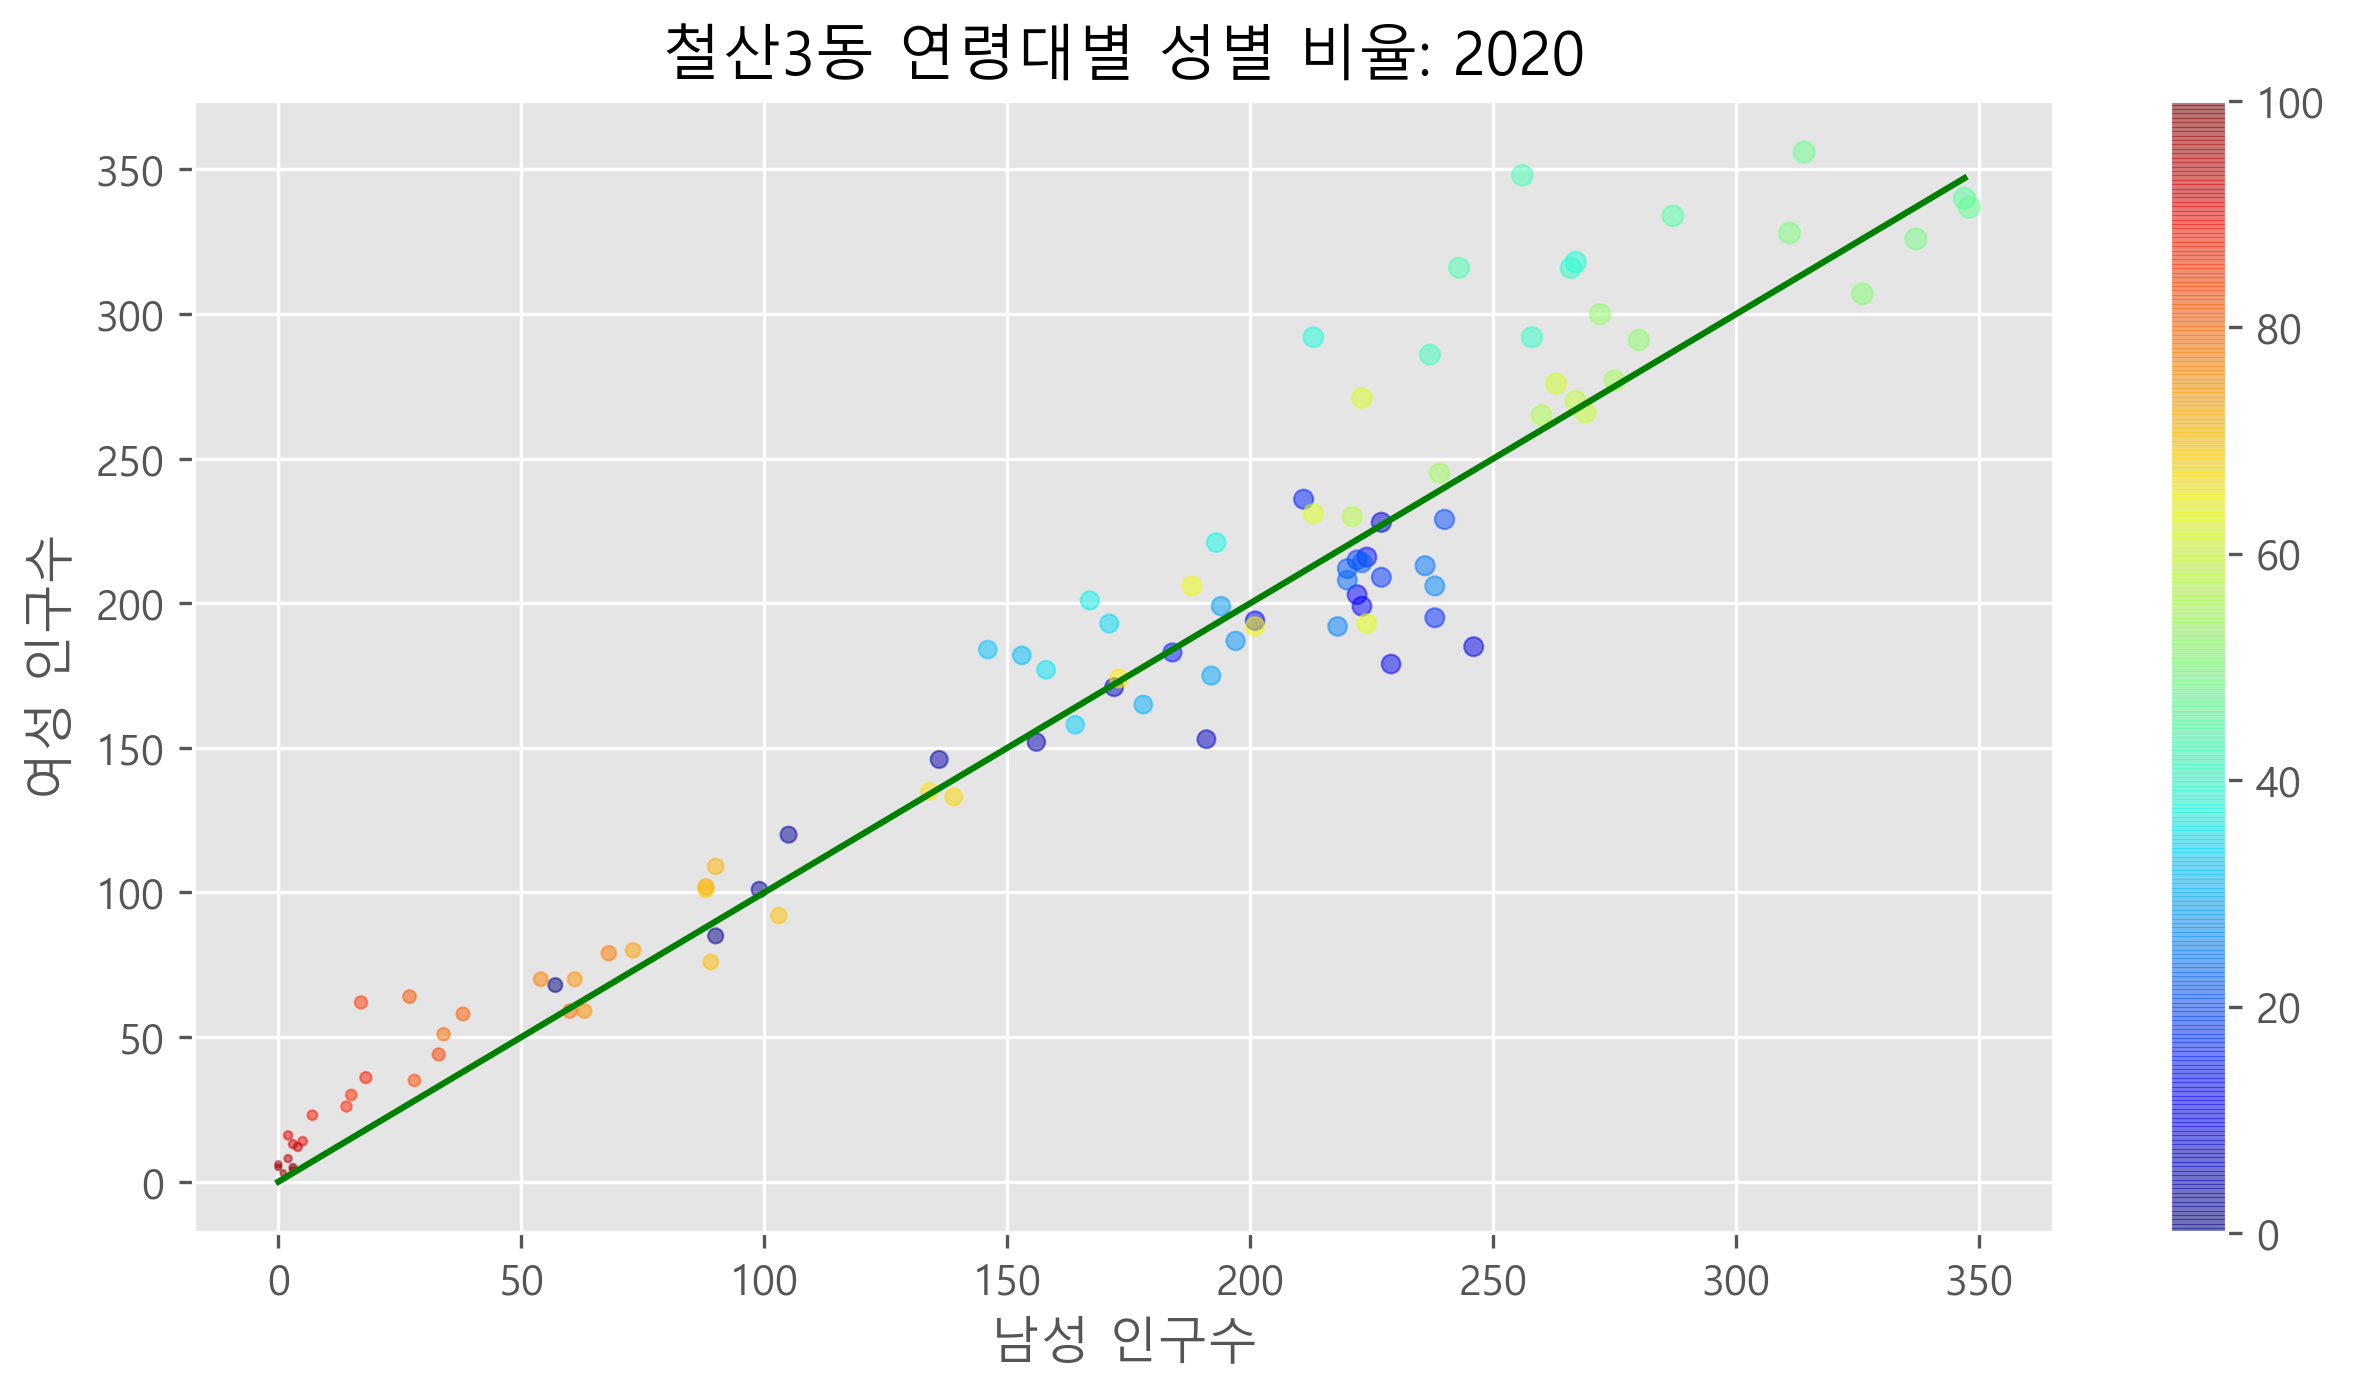

In [12]:
import csv
import math
import matplotlib.pyplot as plt


name = input('찾고 싶은 지역의 이름을 알려주세요: ')

##2009
g09 = csv.reader(open('gender09.csv'))
m09 = []
f09 = []
s09 = []

for row in g09:
    if name in row[0]:
        for i in range(3,104):
            m09.append(int(row[i]))
            f09.append(int(row[i+103]))
            s09.append(math.sqrt(int(row[i])+int(row[i+103])))    #버블원의 크기는 인구수의 제곱근으로 표현
        break

        
##2020        
g20 = csv.reader(open('gender20.csv'))
m20 = []
f20 = []
s20 = []

for row in g20:
    if name in row[0]:
        for i in range(3,104):
            m20.append(int(row[i]))
            f20.append(int(row[i+103]))
            s20.append(math.sqrt(int(row[i])+int(row[i+103])))
        break

##2009        
plt.style.use('ggplot')
plt.rc('font', family='Malgun Gothic')
plt.figure(figsize=(10,5), dpi=300)
plt.title(name+ ' 연령대별 성별 비율: 2009')
plt.scatter(m09, f09, s=s09, c=range(101), alpha=0.5, cmap='jet')    # 컬러바(cmap)는 jet로 표현 
plt.colorbar()
plt.plot(range(max(m09)), range(max(m09)), 'g')    #추세선 그래프는 녹색
plt.xlabel('남성 인구수')
plt.ylabel('여성 인구수')  
plt.savefig('성별비율_2009.png')    #이미지 파일로 저장
plt.show()

##2020
plt.style.use('ggplot')
plt.rc('font', family='Malgun Gothic')
plt.figure(figsize=(10,5), dpi=300)
plt.title(name+ ' 연령대별 성별 비율: 2020')
plt.scatter(m20, f20, s=s20, c=range(101), alpha=0.5, cmap='jet')    
plt.colorbar()
plt.plot(range(max(m20)), range(max(m20)), 'g')
plt.xlabel('남성 인구수')
plt.ylabel('여성 인구수')   
plt.savefig('성별비율_2020.png')   
plt.show()